# <i class="fas fa-laptop"></i> Practice: Time Series

```{jupyter-info}
{rel-data-download}`google.csv`
```

> In this notebook, we use a few features of this library called `matplotlib` (renamed as `plt`) to save a plot to a file. You do not need to understand this part and can leave those parts of the code untouched. We will discuss `matplotlib` in the next module!

```{figure} images/stonks.jpeg
---
scale: 15%
figclass: margin
---
How I assume the stock market works
```

In this problem we will be working with stock-market data. Don't worry, you don't need to understand how stocks work to do this problem (Hunter sure doesn't!). All the background you need to know is that a higher number corresponds to more value (money), and a lower number corresponds to less value (money).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# A special magic command to make plots work in the notebook
%matplotlib inline

## Problem 0
Load in the Google stocks dataset from the file `google.csv` so that the `Date` column becomes the time-series index.

**For testing purposes, store the result in a variable called `goog`.**

You might also want to make sure you display `goog.head()` so you can get an idea what the `DataFrame` looks like.

In [4]:
# Write your code here!
goog = pd.read_csv('google.csv', index_col='Date', parse_dates=True, date_format='%Y-%m-%d')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


For this notebook, we will only be looking at the column `Adj Close` that represents the value of the stock at the end of the day. Whenever we ask you to plot something, you should grab the `Series` for that column and plot with the `plot` function in it (e.g., `df['col'].plot()`)

## Problem 1
Use the `plot` function to plot the `Adj Close` column for the entire dataset. 

**Do not customize your plot in any way for this problem, since we will compare it to the plain plot.**

Your plot should look like the plot below:

![Problem 1](images/prob1.png)

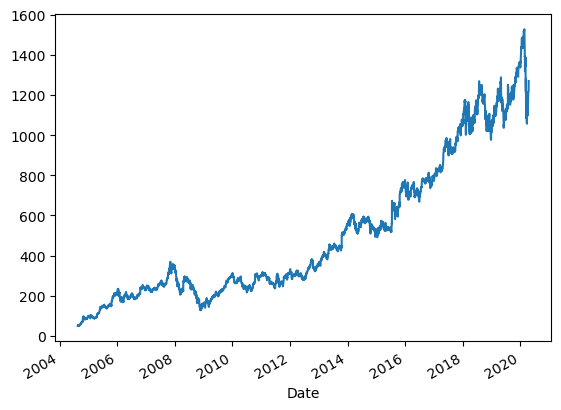

In [10]:
# Write your code below this comment and above the next comment!

goog['Adj Close'].plot()
# Write your code above this line!
plt.savefig('prob1.png')

## Problem 2
Let's get a closer look to see how the Covid-19 pandemic impacted Google's stock price. Select the subset of the data from October 2019 (month 10) to April 2020 (month 4). You should not specify any days in your indexing. Store your result of the `Adj Close` prices for this range of dates as a `Series`.

**For testing purproses, store your result in a variable called `ans2`.**

At the end of the testing cell, we plot your `ans2` to visually inspect the change in the stock price.

<Axes: xlabel='Date'>

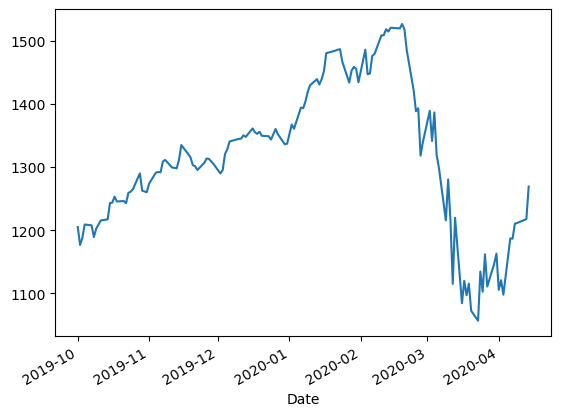

In [9]:
# Write your code below this comment and above the next comment!
ans2 = goog.loc['2019-10' : '2020-04', 'Adj Close']

# Write your code above!
ans2.plot()

## Problem 3
To remove some of the noise, let's change the frequency of the data from daily to **monthly** to see how Google has done year to year. 

Compute the monthly **average** value for the column `Adj Close`. Your result should be a `Series` indexed by each month over the 15 or so years of data and each value is the average value for all rows that belonged to that year.

**For testing purposes, store the result in a variable called `ans3`.**

Your plot will look somewhat similar to the plot in plot 4 (but will be a little smoother).

*Hint: Look at the reading before to see how we change the time-frequency of a time-series dataset.* 

<Axes: xlabel='Date'>

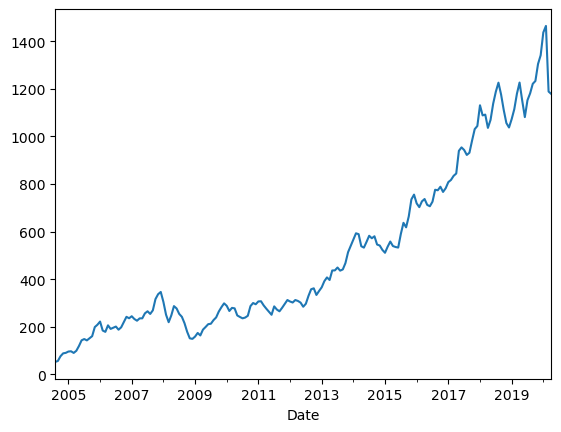

In [23]:
# Write your code below this comment and above the next comment!

ans3 = goog.resample('M')['Adj Close'].mean()
# Write your solution above!
ans3.plot()

## Problem 4
For this problem, we are going to be a little adventurous and have you explore some **documentation** to learn how to use a new `pandas` function. We highly recommend that you start by reading the brief description at the top and then looking down at the examples. There is NO way that you will read this and understand every parameter available or all the syntax they use, but you WILL be able to look at an example and translate it to what you need.

For this problem, we want to compute a [rolling average](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) of the data over a two-week period. Recall that each row corresponds to a single day so two weeks corresponds to 14 days. This is different than a resample operation since for each day, it will take the average of the last 14 days (hence why it's called a rolling average).

Your result should be a `Series` with the same index. The first few rows should be `NaN` as the documentation linked in the last paragraph suggests in their examples (since there is not enough data for the rolling average at the start).

**For testing purposes, store the result in a variable called `ans4`.**

Your result should look something like the following and when plotted should look like the plot below (check the output after your code cell).
```
Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23            NaN
2004-08-24            NaN
2004-08-25            NaN
                 ...     
2020-04-07    1125.788565
2020-04-08    1132.573565
2020-04-09    1142.511422
2020-04-13    1154.007141
2020-04-14    1163.633571
Name: Adj Close, Length: 3940, dtype: float64
```

![Problem 4](images/prob4.png)

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23            NaN
2004-08-24            NaN
2004-08-25            NaN
                 ...     
2020-04-07    1125.788565
2020-04-08    1132.573565
2020-04-09    1142.511422
2020-04-13    1154.007141
2020-04-14    1163.633571
Name: Adj Close, Length: 3940, dtype: float64

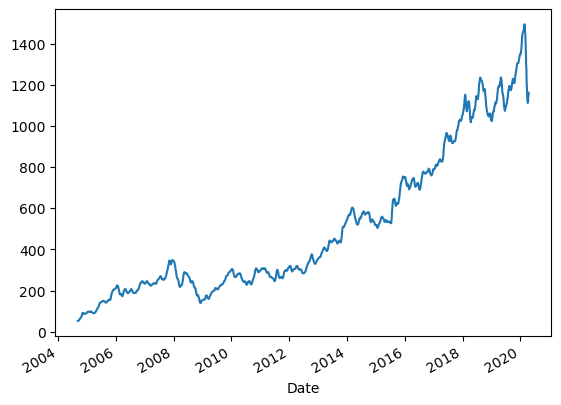

In [29]:
# Write your code below this comment and above the next comment!
ans4 = goog.rolling(14)['Adj Close'].mean()


# Write your solution above
ans4.plot()
ans4